<a href="https://colab.research.google.com/github/PsihAnalitik/testTask/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00


In [2]:
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import glob

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/GreenAtom/aclImdb_v1/aclImdb/train'

In [ ]:
X = []
y = []
file_paths = glob.glob(path + '/all/*.txt')
for file_path in file_paths:
        with open(file_path,'r') as file:
            content = file.read()
            file_name = os.path.basename(file_path)
            name = file_name.split('.')[0]
            X.append(content)
            y.append(name[-1])
print(len(X))

25000


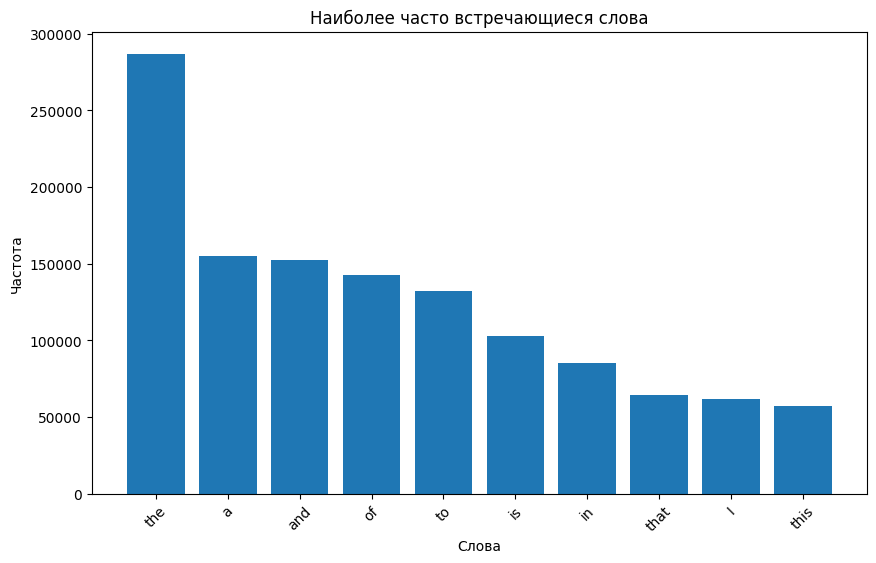

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Преобразуйте массив отзывов в одну строку

text = ','.join(X)

# Разделите строку на отдельные слова
words = text.split()

# Подсчитайте количество вхождений каждого слова
word_counts = Counter(words)

# Получите наиболее часто встречающиеся слова и их количество
most_common_words = word_counts.most_common(10)  # Здесь можно указать любое желаемое количество слов

# Разделите слова и их частоты на два отдельных списка
words, counts = zip(*most_common_words)

# Создайте график
plt.figure(figsize=(10, 6))
plt.bar(words, counts)

# Настройте оси и заголовок графика
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Наиболее часто встречающиеся слова')

# Поворачиваем подписи на оси X для улучшения читаемости
plt.xticks(rotation=45)

# Отобразите график
plt.show()


In [ ]:
import re

for i in range(len(X)):
    s = str(X[i])
    s = s.lower()
    X[i] = s

In [ ]:
print(X[0])

i am really surprised that this movie get a ranking like this i haven't seen such a bad movie for this was a really bad movie splatter is not enough to describe the unnecessary nearly funny blood scenes if you didn't like hostel or wolf creek or halloween well this is 10 time worse the story remind me re stone i can't tell about the acting since the script was so all the time why i must write i never understood comes the story is about a butcher killing people all the time in metro we are talking about thousands of killings and no one gets notice actually those people are just missing and there is the good guy that tries to solve the mystery well there is no mystery for us because we know from the beginning the bad guys and as usual no one believes him what a surprise in the end he puts butcher clothes and fights to death with the killer butcher


In [ ]:
X_train = X
y = np.array(y)
y_train = tf.one_hot(y, depth = 10)

In [ ]:
model_name = 'bert-base-uncased'
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=10)
tokenizer = BertTokenizer.from_pretrained(model_name)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=256, return_tensors = 'tf')


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

In [ ]:
model.fit(dict(train_encodings), y_train, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 1.3810 - accuracy: 0.4555

782/782 [==============================] - 1380s 2s/step - loss: 1.3810 - accuracy: 0.4555
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 1.2499 - accuracy: 0.4953

782/782 [==============================] - 1296s 2s/step - loss: 1.2499 - accuracy: 0.4953
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 1.1332 - accuracy: 0.5444

782/782 [==============================] - 1296s 2s/step - loss: 1.1332 - accuracy: 0.5444
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 1.0193 - accuracy: 0.5868

782/782 [==============================] - 1296s 2s/step - loss: 1.0193 - accuracy: 0.5868
Epoch 5/10
782/782 [==============================] - ETA: 0s - loss: 0.9080 - accuracy: 0.6360

782/782 [==============================] - 1295s 2s/step - loss: 0.9080 - accuracy: 0.6360
Epoch 6/10
782/782 [==============================] - ETA: 0s - loss: 0.7955 - accuracy: 0.6889

782/782 [==============================] - 1295s 2s/step - loss: 0.7955 - accuracy: 0.6889
Epoch 7/10
782/782 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.7353

782/782 [==============================] - 1295s 2s/step - loss: 0.6857 - accuracy: 0.7353
Epoch 8/10
782/782 [==============================] - ETA: 0s - loss: 0.5938 - accuracy: 0.7722

782/782 [==============================] - 1294s 2s/step - loss: 0.5938 - accuracy: 0.7722
Epoch 9/10
782/782 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.8134

782/782 [==============================] - 1295s 2s/step - loss: 0.5019 - accuracy: 0.8134
Epoch 10/10
782/782 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.8394

782/782 [==============================] - 1295s 2s/step - loss: 0.4335 - accuracy: 0.8394


In [ ]:
model.save('/content/drive/MyDrive/model_04', save_format='tf')

In [ ]:
model.save_weights('/content/drive/MyDrive/GreenAtom/model_weights_04.h5')

In [4]:
model2 = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=10)
model2.load_weights('/content/drive/MyDrive/GreenAtom/model_weights_04.h5')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

y_pred = model2.predict(dict(train_encodings))

# Получение предсказанных меток классов
y_pred_labels = np.argmax(y_pred.logits, axis=1)

In [ ]:
print(y_pred_labels)
print(y)
y1 = [int(y[i]) for i in range(len(y))]
print(y1)

[1 3 1 ... 0 0 0]
['1' '3' '1' ... '0' '0' '0']
[1, 3, 1, 1, 3, 4, 2, 4, 1, 4, 3, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 3, 2, 2, 4, 3, 4, 1, 3, 1, 2, 3, 1, 1, 4, 2, 1, 4, 1, 2, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 4, 4, 3, 1, 1, 1, 1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 1, 4, 4, 3, 2, 4, 3, 4, 4, 4, 1, 2, 3, 4, 1, 1, 2, 4, 3, 3, 1, 4, 2, 4, 1, 3, 3, 2, 2, 2, 4, 1, 4, 2, 1, 4, 1, 3, 1, 3, 2, 2, 4, 3, 4, 1, 3, 4, 4, 4, 1, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 3, 4, 1, 3, 2, 4, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 4, 2, 1, 3, 1, 2, 4, 1, 1, 1, 4, 1, 4, 1, 1, 3, 2, 3, 2, 1, 1, 3, 3, 1, 2, 4, 2, 1, 2, 3, 1, 1, 2, 1, 4, 4, 1, 3, 2, 2, 1, 3, 4, 1, 4, 2, 3, 3, 1, 3, 4, 1, 3, 4, 1, 1, 4, 4, 4, 1, 2, 3, 4, 3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 1, 4, 4, 1, 4, 1, 1, 4, 1, 2, 1, 1, 1, 3, 4, 1, 4, 4, 4, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 4, 4, 3, 1, 1, 4, 1, 1, 2, 4, 3, 4, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 

In [ ]:

# Оценка производительности модели
accuracy = accuracy_score(y1, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.91592


NameError: ignored

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y1, y_pred_labels, average='micro')

# Recall
recall = recall_score(y1, y_pred_labels, average='micro')

# F1-score
f1 = f1_score(y1, y_pred_labels, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.91592
Recall: 0.91592
F1-score: 0.91592


In [8]:
X = []
y = []
file_paths = glob.glob('/content/drive/MyDrive/GreenAtom/aclImdb_v1/aclImdb/test/all/*.txt')
for file_path in file_paths:
        with open(file_path,'r') as file:
            content = file.read()
            file_name = os.path.basename(file_path)
            name = file_name.split('.')[0]
            X.append(content)
            y.append(name[-1])
X_test = X
y_test = [int(el) for el in y]

In [9]:
print(X_test[0])
print(y_test[0])

If you want to waste a small portion of your life sit in front of this predictable zombie film. It fails at the first post by not being scary OR funny. It is a dull grey movie that I guess went straight to video. Hammy and tongue in cheek acting leave a sour taste in the mouth. If you want to watch a poor but still watchable recent zombie film watch Diary of the Dead. Poor special effects, school level script. Zombie films work if they have a moral point or even a political point . This movie has nothing, there is no worthy point that zombification underscores. This is as thrilling and convincing as a Republican Convention, no sorry watching the Republican Convention would be a better example of a Zombie movie.
1


In [10]:
import re

for i in range(len(X_test)):
    s = str(X_test[i])
    s = s.lower()
    X_test[i] = s

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=256, return_tensors = 'tf')

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

y_pred = model2.predict(dict(test_encodings))


y_pred_labels = np.argmax(y_pred.logits, axis=1)

782/782 [==============================] - 443s 551ms/step


In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_labels)

precision = precision_score(y_test, y_pred_labels, average='micro')

recall = recall_score(y_test, y_pred_labels, average='micro')

f1 = f1_score(y_test, y_pred_labels, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.4596
Precision: 0.4596
Recall: 0.4596
F1-score: 0.4596


In [21]:
accuracy = accuracy_score(y_test, y_pred_labels)

precision = precision_score(y_test, y_pred_labels, average='macro')

recall = recall_score(y_test, y_pred_labels, average='macro')

f1 = f1_score(y_test, y_pred_labels, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.4596
Precision: 0.4178634627120205
Recall: 0.41485336143364526
F1-score: 0.4154445521068101


In [22]:
accuracy = accuracy_score(y_test, y_pred_labels)

precision = precision_score(y_test, y_pred_labels, average='weighted')

recall = recall_score(y_test, y_pred_labels, average='weighted')

f1 = f1_score(y_test, y_pred_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.4596
Precision: 0.4642574944131446
Recall: 0.4596
F1-score: 0.461155512520404
